In [1]:
import pandas as pd


import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [2]:
path = '/home/hassan/lily/MLA/FDA/inpatient_admission_withtarget.csv'
inpatient = pd.read_csv(path).iloc[:,1:]
inpatient.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Cardiovascular,Readmission
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,0,1,NaN,1.0,Utah,0,0
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,0,1,0.0,0.0,North Carolina,0,1
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,0,1,NaN,0.0,North Carolina,0,1
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,0,1,NaN,1.0,Florida,0,0
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,0,1,NaN,NaN,Idaho,0,0


In [4]:
inpatient['Admission date'] = pd.to_datetime(inpatient['Admission date'])
inpatient['Discharge date'] = pd.to_datetime(inpatient['Discharge date'])
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522740 entries, 0 to 522739
Data columns (total 18 columns):
 #   Column                                               Non-Null Count   Dtype         
---  ------                                               --------------   -----         
 0   Internalpatientid                                    522740 non-null  int64         
 1   Age at admission                                     522740 non-null  float64       
 2   Admission date                                       522740 non-null  datetime64[ns]
 3   Discharge date                                       522246 non-null  datetime64[ns]
 4   Admitting unit service                               522740 non-null  object        
 5   Discharging unit service                             522740 non-null  object        
 6   Admitting specialty                                  522740 non-null  object        
 7   Discharging specialty                                522740 non-null  obje

In [29]:
inpatient_date = inpatient[['Internalpatientid','Admission date','Discharge date','Died during admission', 'Readmission']]
inpatient_date = inpatient_date.groupby(['Internalpatientid','Admission date','Discharge date']).apply(lambda x:x).sort_values(by = ['Internalpatientid','Admission date'],ascending=True).reset_index(drop = True)
inpatient_date

/tmp/ipykernel_134712/1626924748.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  inpatient_date = inpatient_date.groupby(['Internalpatientid','Admission date','Discharge date']).apply(lambda x:x).sort_values(by = ['Internalpatientid','Admission date'],ascending=True).reset_index(drop = True)


,Internalpatientid,Admission date,Discharge date,Died during admission,Readmission
0,1,2011-12-10 18:28:02,2011-12-14 18:23:17,0,1
1,1,2012-08-10 23:27:47,2012-08-14 20:57:06,0,1
2,1,2016-07-16 15:18:16,2016-07-22 21:36:24,0,1
3,1,2022-12-31 05:41:51,2023-01-01 23:06:30,0,1
4,2,2009-09-30 11:42:00,2009-10-01 06:33:38,0,1
...,...,...,...,...,...
522241,169062,2005-03-17 06:48:07,2005-04-29 10:02:03,0,1
522242,169062,2005-05-17 11:24:53,2005-05-19 03:28:31,0,1
522243,169062,2005-06-01 02:09:21,2005-06-04 03:34:07,0,1
522244,169062,2005-09-02 00:52:01,2005-10-14 23:52:38,1,1


In [31]:
inpatient_date['Time interval'] = inpatient_date['Discharge date'] - inpatient_date['Admission date'].shift(1)
inpatient_date.loc[inpatient_date.groupby('Internalpatientid')['Time interval'].head(1).index, 'Time interval'] = pd.Timedelta("0 days") 
inpatient_date['Time interval'] = inpatient_date['Time interval'].dt.days
inpatient_date

,Internalpatientid,Admission date,Discharge date,Died during admission,Readmission,Time interval
0,1,2011-12-10 18:28:02,2011-12-14 18:23:17,0,1,0
1,1,2012-08-10 23:27:47,2012-08-14 20:57:06,0,1,248
2,1,2016-07-16 15:18:16,2016-07-22 21:36:24,0,1,1441
3,1,2022-12-31 05:41:51,2023-01-01 23:06:30,0,1,2360
4,2,2009-09-30 11:42:00,2009-10-01 06:33:38,0,1,0
...,...,...,...,...,...,...
522241,169062,2005-03-17 06:48:07,2005-04-29 10:02:03,0,1,63
522242,169062,2005-05-17 11:24:53,2005-05-19 03:28:31,0,1,62
522243,169062,2005-06-01 02:09:21,2005-06-04 03:34:07,0,1,17
522244,169062,2005-09-02 00:52:01,2005-10-14 23:52:38,1,1,135


In [35]:
inpatient_date[inpatient_date['Internalpatientid'] == 93527]

,Internalpatientid,Admission date,Discharge date,Died during admission,Readmission,Time interval
286064,93527,1998-06-14 04:00:11,1998-06-14 23:43:39,0,1,0
286065,93527,2021-01-29 08:43:26,2021-01-29 23:46:31,0,1,8265


In [33]:
inpatient_date.describe()

,Internalpatientid,Died during admission,Readmission,Time interval
count,522246.000000,522246.000000,522246.000000,522246.000000
mean,84801.143781,0.031393,0.969062,319.906362
std,48934.195983,0.174378,0.173149,659.748056
min,1.000000,0.000000,0.000000,0.000000
25%,42246.000000,0.000000,1.000000,12.000000
50%,85361.000000,0.000000,1.000000,67.000000
75%,127132.000000,0.000000,1.000000,302.000000
max,169064.000000,1.000000,1.000000,8265.000000


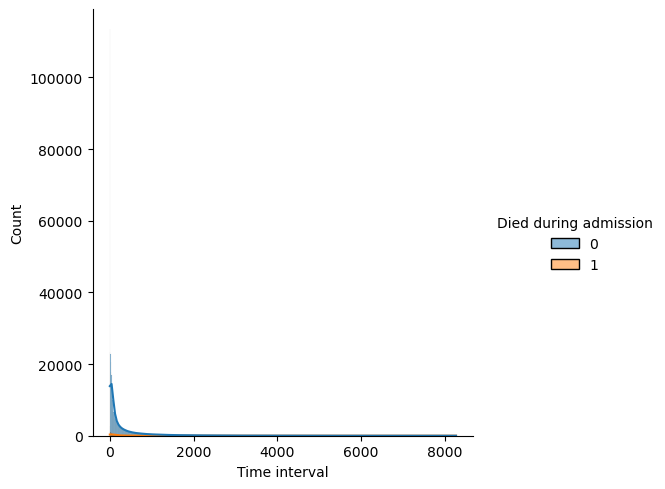

In [36]:
sns.displot(data= inpatient_date, x='Time interval',hue = 'Died during admission',kde = True)

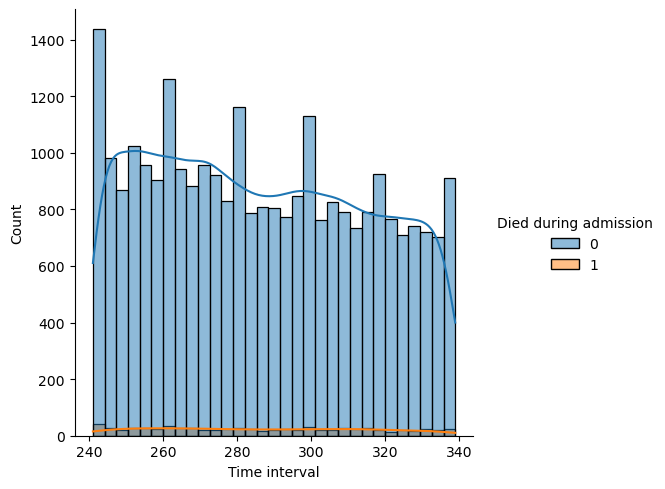

In [39]:
sns.displot(data= inpatient_date.loc[(inpatient_date['Time interval']>240) & (inpatient_date['Time interval']<340)], x='Time interval',hue = 'Died during admission',kde = True)

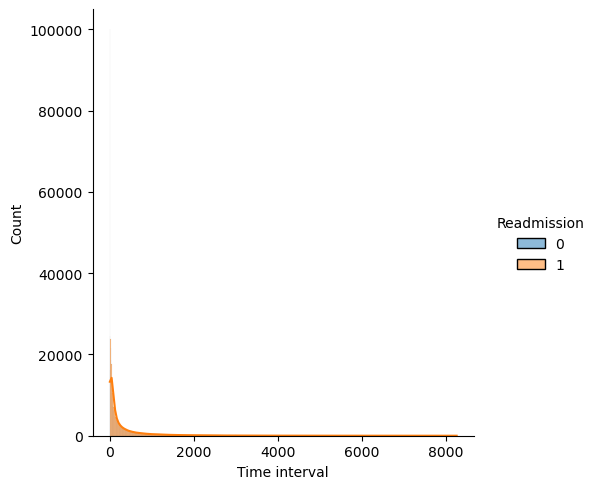

In [37]:
sns.displot(data= inpatient_date, x='Time interval',hue = 'Readmission',kde = True)

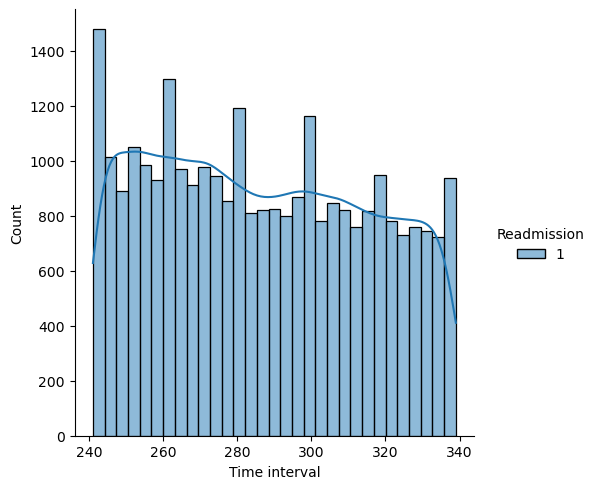

In [40]:
sns.displot(data= inpatient_date.loc[(inpatient_date['Time interval']>240) & (inpatient_date['Time interval']<340)], x='Time interval',hue = 'Readmission',kde = True)

<Axes: xlabel='Readmission', ylabel='Time interval'>

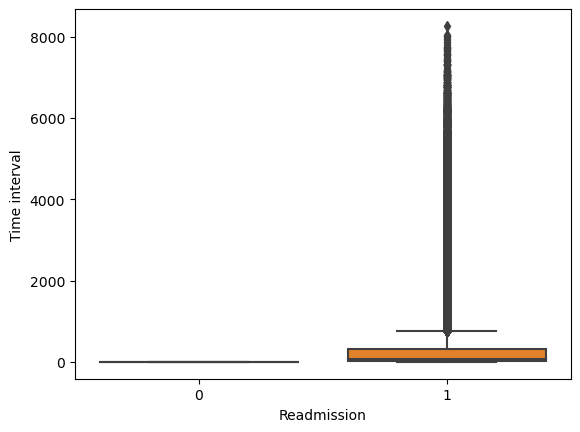

In [44]:
sns.boxplot(data= inpatient_date, x= 'Readmission', y ='Time interval')